## 2. CUR decomposition

In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [3]:
def CUR_decomp(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    #print(prob_row_cumsum)
    
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        #x = np.where(prob_col_cumsum>=p)
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
        
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    # Solve U = C^(-1)*X*R^(-1)
    U = la.pinv(C) @ X @ la.pinv(R)
    return C, U, R



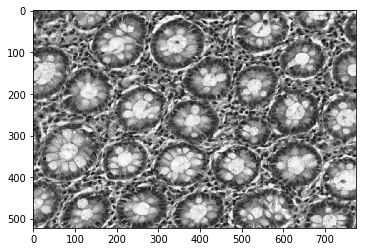

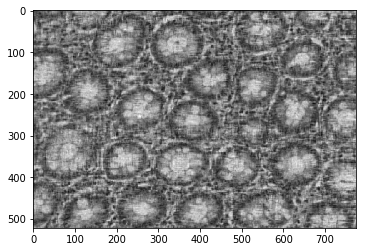

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#img = plt.imread("test_image.png")
img = plt.imread("10-12813-01-2.bmp")
gray_img = rgb2gray(img)   
plt.clf
plt.imshow(gray_img,cmap='gray')
plt.show()


C, U, R = CUR_decomp(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()

# print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
# print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
# print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

In [5]:
def CUR_decomp_primitive(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    
    Psi = R[:,id_col].T/np.sqrt(s * prob_row[id_col,None])
    k = min(np.linalg.matrix_rank(R @ R.T,tol=1e-3),r)
    u, s, vt =  np.linalg.svd(R @ R.T)
    sinv =np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    RRTinv = u @ np.diag(sinv) @ vt
    U = Psi @ RRTinv
    return C, U, R


In [73]:
# C, U, R = CUR_decomp_primitive(gray_img, 100, 100)
# plt.clf()
# plt.imshow(C @ U @ R, cmap='gray')
# plt.show()


# print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
# print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
# print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

In [6]:

def CUR_decomp_primitive_column(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    Psi =C[id_row,:].T/np.sqrt(r * prob_row[None, id_row])
    k = min(np.linalg.matrix_rank(C.T @ C,tol=1e-3),r)
    u, s, vt =  np.linalg.svd(C.T @ C)
    sinv =np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    CTCinv = u @ np.diag(sinv) @ vt

    U = CTCinv @ Psi
    return C, U, R

For analysis of error, you can estimate $\frac{\|A-CUR\|}{\|A\|}$ and try to let the error be less than $10\%$. Below are one specific example. Based on choice of $U$, there will be three possibilities.

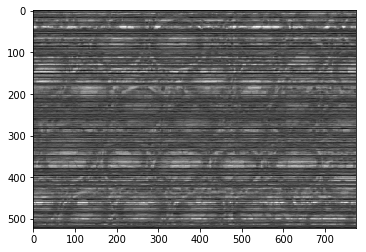

L2_norm error 93.93086122499155%
Nuclear_norm error 90.83158998499663%
Frobenius_norm error 94.19380930636433%


In [7]:
C, U, R = CUR_decomp_primitive_column(gray_img, 200, 200)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))


For block CUR decomposition. You can try either sample in group or sample in each block. Here is one example of sample in block

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
img = plt.imread("test_image.png")
gray_img = rgb2gray(img)   
plt.clf
plt.imshow(gray_img,cmap='gray')
plt.show()

block_img = np.zeros(gray_img.shape)

# 8 by 8 blocks with each block 64*64
for i in range(8):
    for j in range(8):
        part = gray_img[i*64:(i+1)*64,j*64:(j+1)*64]
        C, U, R = CUR_decomp(part, 12, 12)
        block_img[i*64:(i+1)*64,j*64:(j+1)*64] = C@U@R
        
plt.clf()
plt.imshow(block_img, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( block_img),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (block_img),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (block_img),'fro')/la.norm(gray_img,'fro')*100))




FileNotFoundError: [Errno 2] No such file or directory: 'test_image.png'

## 4. Projection onto simplex and do gradient descent

Note it is enough to solve the projection via numerical method. In the code we chose Newton's method.

In [15]:
def descent(input_data, loss_func, update, T, **kwargs):
    x = None
    prev_x = None
    loss = []
    x_list = []
    if 'momentum' in kwargs:
        momentum = kwargs['momentum']
    else:
        momentum = False
    save_list = kwargs.get('save', True)
    #loss_interval = kwargs.get('plot_interval',1)
    for t in range(T):
        #print('.', end='',flush=True)
        if momentum is True:
            tmp = prev_x
            prev_x = x
            x = update(x, tmp, t, input_data, **kwargs)
        else:
            x = update(x, t, input_data, **kwargs)
        if t%1==0:
            loss.append(loss_func(input_data, x, **kwargs))
            assert not np.isnan(loss[-1])
            if save_list or t==T-1:
                #print(t)
                x_list.append(x)
    return x_list, loss 

# update scheme (gradient descent)
def PGD_update(beta,t,data,**kwargs):
    eta = kwargs.get('eta',1e-4)
    X = data['X']
    y = data['y']
    
    if beta is None:
        # proper initialization
        beta = np.ones(X.shape[1])/X.shape[1]
    
    # subgradient descent
    alpha = beta - eta* X.T @ (X @ beta - y)
    
    # Use Newton's method to solve simplex projection problem
    mu = np.min(alpha)
    T =kwargs.get('NewtonMaxIteration',20)
    tolerance = kwargs.get('NewtonTolerance', 1e-7)
    
    for i in range(T):
        obj = np.sum(np.maximum(alpha- mu,0))-1
        if np.abs(obj)< tolerance:
            break
        mu = mu - obj / (np.sum(np.sign(np.minimum(mu - alpha ,0))))
        
    beta = np.maximum(alpha- mu, 0)
    return beta


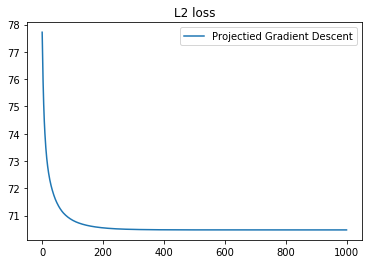

In [17]:
import numpy.random as rn
rn.seed(9)
A = rn.rand(1000,500)
rn.seed(9)
b = rn.rand(1000)

data={'X':A, 'y':b}
plot_title= "L2 loss"

# default eta= 1e-4
x_list, loss = descent(data,robust_regression_loss_L2,PGD_update,1000)

plt.clf()
plt.plot(loss, label='Projectied Gradient Descent')
plt.title(plot_title)
plt.legend()
plt.show()
            

In [ ]:
import numpy as np
from numpy.linalg import norm

from random import normalvariate
from math import sqrt


def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]


def svd_1d(A, epsilon=1e-10):
    ''' The one-dimensional SVD '''

    n, m = A.shape
    x = randomUnitVector(min(n,m))
    lastV = None
    currentV = x

    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iterations = 0
    while True:
        iterations += 1
        lastV = currentV
        currentV = np.dot(B, lastV)
        currentV = currentV / norm(currentV)

        if abs(np.dot(currentV, lastV)) > 1 - epsilon:
            print("converged in {} iterations!".format(iterations))
            return currentV


def svd(A, k=None, epsilon=1e-10):
    '''
        Compute the singular value decomposition of a matrix A
        using the power method. A is the input matrix, and k
        is the number of singular values you wish to compute.
        If k is None, this computes the full-rank decomposition.
    '''
    A = np.array(A, dtype=float)
    n, m = A.shape
    svdSoFar = []
    if k is None:
        k = min(n, m)

    for i in range(k):
        matrixFor1D = A.copy()

        for singularValue, u, v in svdSoFar[:i]:
            matrixFor1D -= singularValue * np.outer(u, v)

        if n > m:
            v = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)  # next singular value
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)  # next singular value
            v = v_unnormalized / sigma

        svdSoFar.append((sigma, u, v))

    singularValues, us, vs = [np.array(x) for x in zip(*svdSoFar)]
    return singularValues, us.T, vs


if __name__ == "__main__":
    movieRatings = np.array([
        [2, 5, 3],
        [1, 2, 1],
        [4, 1, 1],
        [3, 5, 2],
        [5, 3, 1],
        [4, 5, 5],
        [2, 4, 2],
        [2, 2, 5],
    ], dtype='float64')

    # v1 = svd_1d(movieRatings)
    # print(v1)

theSVD = svd(movieRatings)

In [11]:
X = np.random.rand(4,4)
X

array([[0.90578481, 0.77611267],
       [0.5586657 , 0.14140001]])

In [42]:
X_square = X**2
print(X_square)
X_square = X**2
prob_col = np.sum(X_square,axis=0)
prob_row = np.sum(X_square,axis=1)

print(np.sum(prob_col))
print(np.sum(prob_row))
prob_col = prob_col/ np.sum(prob_col)
prob_row = prob_row/ np.sum(prob_row)
prob_col_cumsum = np.cumsum(prob_col)
prob_row_cumsum = np.cumsum(prob_row)
    


[[0.82044613 0.60235088]
 [0.31210737 0.01999396]]
1.7548983368866455
1.754898336886645


In [28]:
print(prob_col_cumsum) 
print(prob_row_cumsum) 

prob_col

[0.64536701 1.        ]
[0.81075751 1.        ]


In [50]:
p = np.random.rand()
p 

0.518736990601663

In [51]:
np.where(prob_col_cumsum>=p)

(array([0, 1]),)

In [52]:
np.where(prob_col_cumsum>=p)[0]

array([0, 1])

In [57]:
id_col = np.where(prob_col_cumsum>=p)[0]
print(X[:,id_col])


[[0.90578481 0.77611267]
 [0.5586657  0.14140001]]


In [23]:
def columnselect(X,c,k):
    u, s, vt =  np.linalg.svd(X)
    v_square = (vt.T)**2
    #prob_col = np.sum(v_square,axis=0)
    prob_row = np.sum(v_square[:,:k],axis=1)
    #prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/k
    #prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    id_row = np.zeros(c, np.int)
    for i in range(c):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    #print(id_row)
    C = X[:,id_row] #/np.sqrt(c*c* prob_row[id_row,None])      
    return C


def CUR_leveragescore(X,c,r):
    k = min(np.linalg.matrix_rank(X,tol=1e-3),r) 
    C = columnselect(X,c,k)  
    R = columnselect(X.T,r,k)
    R = R.T
    U = la.pinv(C) @ X @ la.pinv(R)
    return C,U, R

In [10]:
C = columnselect(gray_img, 200, 200)

[  0   0  10  12  15  17  21  22  27  32  43  57  58  63  63  68  69  75
  75  77  78  88  93  96 102 108 113 135 141 143 146 150 160 162 163 177
 178 179 191 196 197 201 205 208 216 233 236 237 240 242 244 244 254 259
 260 261 264 264 274 276 278 279 287 287 290 290 291 294 303 304 310 312
 316 318 319 319 321 323 328 329 330 335 336 340 341 349 356 356 362 367
 368 378 382 382 388 388 390 405 407 408 410 422 422 426 441 444 446 451
 452 452 457 466 468 469 469 471 473 478 483 483 483 486 486 491 492 492
 498 509 509 515 521 521 530 536 537 544 546 547 547 550 550 552 552 553
 557 559 560 562 568 581 584 584 586 592 597 603 606 608 608 619 633 635
 635 640 643 644 664 667 671 672 674 677 680 680 685 687 688 698 698 706
 715 720 721 723 724 724 728 729 740 745 748 750 753 759 763 764 764 767
 770 772]


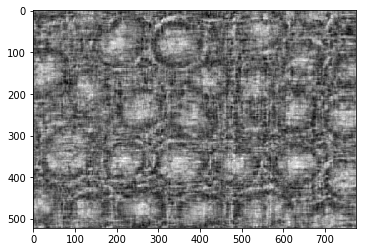

L2_norm error 6.3446288965111926%
Nuclear_norm error 63.5530087589636%
Frobenius_norm error 25.167436153915112%


In [29]:
C,U, R = CUR_leveragescore(gray_img, 50, 50)



plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

In [12]:
print(la.pinv(C).shape)

(200, 522)


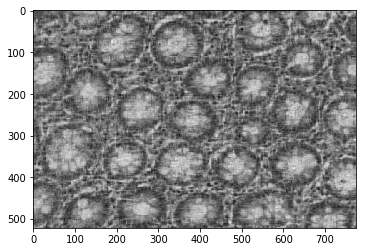

L2_norm error 3.540496395302669%
Nuclear_norm error 45.497342160054785%
Frobenius_norm error 16.17527103032783%


In [27]:
# print(la.pinv(R).shape)
# print(gray_img.shape)

plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))